In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import json
import urllib
import re
import time
%matplotlib inline

## LinkedIn Jobs

In [ ]:
df_l = pd.read_csv('/Users/tingtingweng/Documents/summer_intern/linkedin_jobs_052620-062520.csv')
df_l

,Title,Company,Location,Date,Seniority level,Employment type,Industry,Description,State,Code
0,Data Science Tester,SAIC,"Huntsville, Alabama, United States",2020-06-25,Entry level,Full-time,"Computer Hardware,Defense & Space,Information ...",DescriptionSAIC is seeking a Remote Data Scien...,Alabama,AL
1,ORSA- Sr. Data Scientist,SAIC,"Huntsville, Alabama, United States",2020-06-25,Associate,Full-time,"Computer Hardware,Defense & Space,Information ...",DescriptionJOB DESCRIPTIONSAIC has a current n...,Alabama,AL
2,Data Scientist,Cgi Technologies Corporation,"Birmingham, Alabama, United States",2020-06-24,Entry level,Full-time,"Information Technology and Services,Computer S...",Position Description Do you want to take your ...,Alabama,AL
3,Mid-Level Data Analyst,"Dynamis, Inc.","Prattville, Alabama, United States",2020-06-23,Entry level,Full-time,"Information Technology and Services,Defense & ...",Dynamis is seeking a Mid-level Data Analyst to...,Alabama,AL
4,Data Scientist,CGI,"Birmingham, Alabama, United States",2020-06-23,Entry level,Full-time,"Information Technology and Services,Computer S...",Job DescriptionJob Description Data ScientistP...,Alabama,AL
...,...,...,...,...,...,...,...,...,...,...
10421,"Senior Analyst, Analytics and Data Science",Corkyy,"Washington, District of Columbia, United States",2020-06-08,Not Applicable,Full-time,"Marketing and Advertising,Online Media,Media P...",Corkyy is a purpose-driven job board that show...,"Washington, DC",DC
10422,Lead Data Science Instructor,Corkyy,"Washington, District of Columbia, United States",2020-06-08,Not Applicable,Full-time,"Marketing and Advertising,Online Media,Media P...",Corkyy is a purpose-driven job board that show...,"Washington, DC",DC
10423,Data Scientist,ClearedJobs.Net,"Fort Meade, Maryland, United States",2020-06-08,Entry level,Full-time,"Information Technology and Services,Defense & ...",REQ#: RQ58153Travel Required: 10-25% Public Tr...,Maryland,MD
10424,Data Scientist,"Comtech Global, Inc","Washington, District of Columbia, United States",2020-06-08,Entry level,Full-time,"Information Technology and Services,Computer S...","Role: Data ScientistLocation: Washington, DC (...","Washington, DC",DC


In [ ]:
past_month_l = df_l.loc[(df_l['Date']>='2020-05-26') & (df_l['Date']<='2020-06-25')].reset_index(drop=True)
past_month_l.dropna(inplace=True)

In [ ]:
past_month_l.loc[past_month_l['Company'].str.contains('Amazon'),'Company']='Amazon'
amazon_l = past_month_l.loc[past_month_l['Company'].str.contains('Amazon')].reset_index()
amazon_l

,index,Title,Company,Location,Date,Seniority level,Employment type,Industry,Description,State,Code
0,113,Data Scientist - Nationwide Opportunities,Amazon,"Phoenix, Arizona, United States",2020-06-17,Not Applicable,Full-time,"Computer Software,Information Technology and S...",DescriptionWant to help the largest global ent...,Arizona,AZ
1,169,Applied Scientist,Amazon,"Tempe, Arizona, United States",2020-06-02,Not Applicable,Full-time,"Computer Software,Information Technology and S...","DescriptionCompany: Amazon.Com Services, IncPo...",Arizona,AZ
2,187,Data Scientist,Amazon,"Tempe, Arizona, United States",2020-05-29,Not Applicable,Full-time,"Computer Software,Information Technology and S...",DescriptionMULTIPLE POSITIONS AVAILABLECompany...,Arizona,AZ
3,194,Sr Applied Scientist,Amazon,"Tempe, Arizona, United States",2020-05-27,Mid-Senior level,Full-time,"Computer Software,Information Technology and S...",DescriptionWould you like to pioneer new techn...,Arizona,AZ
4,1186,Software Development Engineer - ML / Big Data ...,Amazon,"Santa Monica, California, United States",2020-06-25,Mid-Senior level,Full-time,"Computer Software,Information Technology and S...",DescriptionHave you ever dreamed about being p...,California,CA
...,...,...,...,...,...,...,...,...,...,...,...
398,9985,Data Scientist,Amazon,"Sunnyvale, California, United States",2020-06-04,Not Applicable,Full-time,"Computer Software,Information Technology and S...",External Job DescriptionDESCRIPTIONAmazon Lab1...,California,CA
399,10074,Applied Scientist - AWS ML Platforms,Amazon,"East Palo Alto, California, United States",2020-05-30,Not Applicable,Full-time,"Computer Software,Information Technology and S...",DescriptionInterested in machine learning and ...,California,CA
400,10080,"Software Development Engineer – Big Data, AWS ...",Amazon,"Palo Alto, California, United States",2020-05-29,Mid-Senior level,Full-time,"Computer Software,Information Technology and S...",DescriptionWant to change the world with Big D...,California,CA
401,10081,Applied Scientist - AWS AI,Amazon,"East Palo Alto, California, United States",2020-05-29,Not Applicable,Full-time,"Computer Software,Information Technology and S...",DescriptionAmazon AI is looking for world clas...,California,CA


In [ ]:
big_companies_l = pd.DataFrame()
for big_company_l in ['Facebook','Apple','Amazon','Google','Microsoft','IBM']:
    big_companies_l = big_companies_l.append(past_month_l.loc[past_month_l['Company']==big_company_l])

#big_companies.reset_index(drop=True, inplace=True)
big_companies_l

,Title,Company,Location,Date,Seniority level,Employment type,Industry,Description,State,Code
7351,"Data Scientist, Product Analytics",Facebook,"Austin, Texas, United States",2020-06-03,Not Applicable,Full-time,Internet,Facebook's mission is to give people the power...,Texas,TX
8661,"Data Scientist, Analytics-Remote Presence",Facebook,"Bellevue, Washington, United States",2020-06-06,Not Applicable,Full-time,Internet,Facebook's mission is to give people the power...,Washington,WA
8720,Linguistic Engineering Manager,Facebook,"Redmond, Washington, United States",2020-06-03,Not Applicable,Full-time,Internet,Facebook's mission is to give people the power...,Washington,WA
8721,Linguistic Engineer,Facebook,"Redmond, Washington, United States",2020-06-03,Not Applicable,Full-time,Internet,Facebook's mission is to give people the power...,Washington,WA
8722,Data Engineer,Facebook,"Seattle, Washington, United States",2020-06-03,Not Applicable,Full-time,Internet,Facebook's mission is to give people the power...,Washington,WA
...,...,...,...,...,...,...,...,...,...,...
9657,Principal Data Scientist- Industrial Discrete ...,IBM,"New York, New York, United States",2020-06-14,Mid-Senior level,Full-time,"Information Technology and Services,Computer S...","IntroductionAs a Data Scientist at IBM, you wi...",New York,NY
9666,Data Scientist- Industrial Discrete Sector Ind...,IBM,"New York, New York, United States",2020-06-13,Mid-Senior level,Full-time,"Information Technology and Services,Computer S...","IntroductionAs a Data Scientist at IBM, you wi...",New York,NY
9692,Watson Health - Researcher/Lead Researcher - L...,IBM,"New York, New York, United States",2020-06-09,Mid-Senior level,Full-time,"Information Technology and Services,Computer S...","IntroductionAs a Data Scientist at IBM, you wi...",New York,NY
9727,Watson Health - Senior Research Analyst,IBM,"New York, New York, United States",2020-06-05,Mid-Senior level,Full-time,"Information Technology and Services,Computer S...","IntroductionAs a Data Scientist at IBM, you wi...",New York,NY


In [ ]:
by_date_l = big_companies_l.groupby('Date').count().sort_values(by=['Date'], ascending=True).reset_index()
by_date_l

,Date,Title,Company,Location,Seniority level,Employment type,Industry,Description,State,Code
0,2020-05-27,6,6,6,6,6,6,6,6,6
1,2020-05-28,6,6,6,6,6,6,6,6,6
2,2020-05-29,18,18,18,18,18,18,18,18,18
3,2020-05-30,16,16,16,16,16,16,16,16,16
4,2020-05-31,11,11,11,11,11,11,11,11,11
5,2020-06-01,17,17,17,17,17,17,17,17,17
6,2020-06-02,12,12,12,12,12,12,12,12,12
7,2020-06-03,60,60,60,60,60,60,60,60,60
8,2020-06-04,20,20,20,20,20,20,20,20,20
9,2020-06-05,27,27,27,27,27,27,27,27,27


In [ ]:
by_company_l = big_companies_l.groupby('Company').count().sort_values(by=['Company'], ascending=True).reset_index()
by_company_l

,Company,Title,Location,Date,Seniority level,Employment type,Industry,Description,State,Code
0,Amazon,403,403,403,403,403,403,403,403,403
1,Apple,68,68,68,68,68,68,68,68,68
2,Facebook,67,67,67,67,67,67,67,67,67
3,Google,11,11,11,11,11,11,11,11,11
4,IBM,62,62,62,62,62,62,62,62,62
5,Microsoft,34,34,34,34,34,34,34,34,34


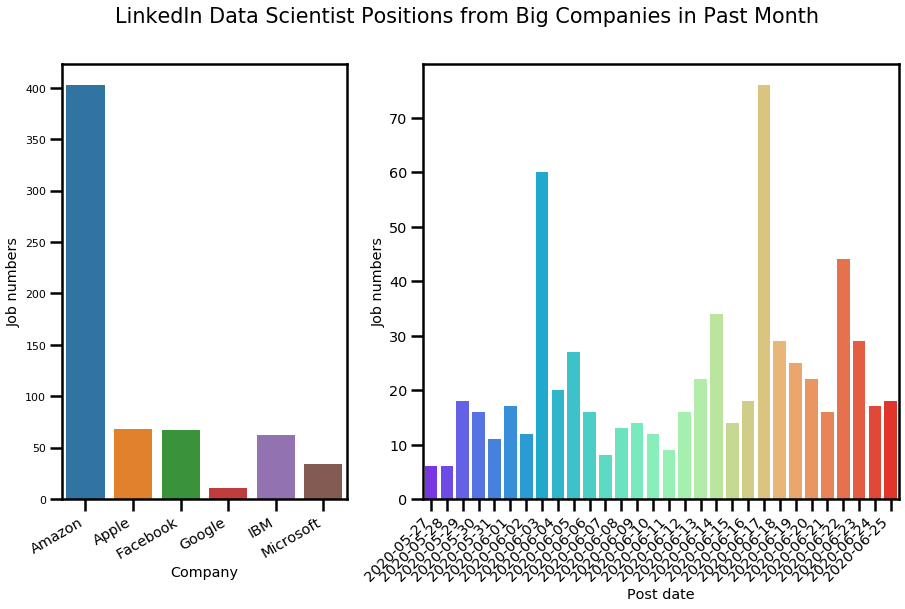

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('poster',font_scale=0.5)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 5]) 
#f, axes = plt.subplots(1,2)
plt.subplot(gs[0])
sns.barplot(x='Company', y='Title',data=by_company_l)
plt.ylabel('Job numbers', fontsize='large')
plt.xlabel('Company', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.subplot(gs[1])
sns.barplot(x='Date', y='Title', data=by_date_l, palette='rainbow')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Job numbers', fontsize='large')
plt.xlabel('Post date', fontsize='large')
plt.suptitle('LinkedIn Data Scientist Positions from Big Companies in Past Month', fontsize='xx-large')
plt.show()

The above figure summerizes data scraped from LinkedIn website showing data scientist job postings of big companies (Amazon including AWS, Apple, Facebook, Google, IBM, and Microsoft) in the past month (05/26/2020-06/25/2020). The left panel demonstrates the comparison of job numbers among these big companies and the right panel shows the distribution of total job postings from these big companies on a daily basis. From the left panel in above figure, we can easily observe that Amazon including AWS has offered largest numbers (over 400) of data scientist job opennings in the past month, far ahead of rest big companies. This result is actually not too intuitive - as we all know, Amazon offers extensive supply for our daily needs including food, grocery, electronics, games and so on during this pandemic. Facebook and Apple almost tie for second place with approximately 70 job postings. There followed IBM whose job postings on LinkedIn are also over 50. Surprisingly, it is shown that Google has posted least data scientist jobs among these big companies. Combined with the trend of job numbers changing with posting date, we can see that job posting numbers peaked at specific days when big companies released majority of jobs on those days. For example, Facebook posted most jobs on June 3rd, and Amazon released plenty of jobs on June 17th and June 22nd, thus leading to the abrupt increase of job opennings on those days. Another pattern easy to observe is that weekdays have way more posting than weekends.

## Indeed Jobs

In [ ]:
df_i = pd.read_csv('/Users/tingtingweng/Documents/summer_intern/Indeed_Jobs_Bycompanies_20200625.csv')
df_i

,Title,Company,Location,Date,Salary,Summary,Description,Date in num,Post date
0,Data Engineer,Amazon.com Services LLC,"Irvine, CA",4 days ago,NaN,"Collaborate with SDEs, PMs, data scientists to...",Bachelor's degree or higher in a quantitative/...,4,2020-06-25
1,Language Engineer,Amazon.com Services LLC,"East Palo Alto, CA",4 days ago,NaN,Manage and process large amounts of linguistic...,"Master’s degree in Linguistics, Computational ...",4,2020-06-25
2,Business Intelligence Engineer,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,5+ years in relevant experience as data scient...,"Bachelor's degree in mathematics, statistics, ...",4,2020-06-25
3,Sr. Machine Learning Scientist,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,Communication and data presentation skills.4+ ...,"An MS in CS, Machine Learning, Statistics, Ope...",4,2020-06-25
4,Head of Autonomous Vehicles Computing Solutions,"Amazon Web Services, Inc.","San Francisco, CA",4 days ago,NaN,"Strong analytical skills, and demonstrated abi...",Bachelor’s degree in technical discipline10+ y...,4,2020-06-25
...,...,...,...,...,...,...,...,...,...
304,"Software Development Engineer, Amazon SageMake...",Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,"Amazon SageMaker, Amazon Web Service's (AWS) M...",2+ years of non-internship professional softwa...,26,2020-05-28
305,Start-ups Business Intelligence Analyst,"Amazon Web Services, Inc.","Seattle, WA",27 days ago,NaN,The ideal candidate will have a rock-solid bac...,Bachelor’s degree in a quantitative field such...,27,2020-05-27
306,User Experience Researcher II (Azure Machine L...,Microsoft,"Redmond, WA",26 days ago,NaN,Our goal is to empower data scientists and ML ...,"In Cloud + AI at Microsoft, we are developing ...",26,2020-05-28
307,Sr. Technical Program Manager (Alexa Machine L...,Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,The ideal candidate will have 10 or more years...,7+ years of relevant engineering experienceExp...,26,2020-05-28


In [ ]:
past_month_i = df_i.loc[(df_i['Post date']>='2020-05-26') & (df_i['Post date']<='2020-06-25')].reset_index(drop=True)
past_month_i

,Title,Company,Location,Date,Salary,Summary,Description,Date in num,Post date
0,Data Engineer,Amazon.com Services LLC,"Irvine, CA",4 days ago,NaN,"Collaborate with SDEs, PMs, data scientists to...",Bachelor's degree or higher in a quantitative/...,4,2020-06-25
1,Language Engineer,Amazon.com Services LLC,"East Palo Alto, CA",4 days ago,NaN,Manage and process large amounts of linguistic...,"Master’s degree in Linguistics, Computational ...",4,2020-06-25
2,Business Intelligence Engineer,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,5+ years in relevant experience as data scient...,"Bachelor's degree in mathematics, statistics, ...",4,2020-06-25
3,Sr. Machine Learning Scientist,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,Communication and data presentation skills.4+ ...,"An MS in CS, Machine Learning, Statistics, Ope...",4,2020-06-25
4,Head of Autonomous Vehicles Computing Solutions,"Amazon Web Services, Inc.","San Francisco, CA",4 days ago,NaN,"Strong analytical skills, and demonstrated abi...",Bachelor’s degree in technical discipline10+ y...,4,2020-06-25
...,...,...,...,...,...,...,...,...,...
304,"Software Development Engineer, Amazon SageMake...",Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,"Amazon SageMaker, Amazon Web Service's (AWS) M...",2+ years of non-internship professional softwa...,26,2020-05-28
305,Start-ups Business Intelligence Analyst,"Amazon Web Services, Inc.","Seattle, WA",27 days ago,NaN,The ideal candidate will have a rock-solid bac...,Bachelor’s degree in a quantitative field such...,27,2020-05-27
306,User Experience Researcher II (Azure Machine L...,Microsoft,"Redmond, WA",26 days ago,NaN,Our goal is to empower data scientists and ML ...,"In Cloud + AI at Microsoft, we are developing ...",26,2020-05-28
307,Sr. Technical Program Manager (Alexa Machine L...,Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,The ideal candidate will have 10 or more years...,7+ years of relevant engineering experienceExp...,26,2020-05-28


In [ ]:
amazon_i = past_month_i.loc[past_month_i['Company'].str.contains('Amazon')].reset_index()
amazon_i

,index,Title,Company,Location,Date,Salary,Summary,Description,Date in num,Post date
0,0,Data Engineer,Amazon.com Services LLC,"Irvine, CA",4 days ago,NaN,"Collaborate with SDEs, PMs, data scientists to...",Bachelor's degree or higher in a quantitative/...,4,2020-06-25
1,1,Language Engineer,Amazon.com Services LLC,"East Palo Alto, CA",4 days ago,NaN,Manage and process large amounts of linguistic...,"Master’s degree in Linguistics, Computational ...",4,2020-06-25
2,2,Business Intelligence Engineer,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,5+ years in relevant experience as data scient...,"Bachelor's degree in mathematics, statistics, ...",4,2020-06-25
3,3,Sr. Machine Learning Scientist,Amazon.com Services LLC,"Seattle, WA",4 days ago,NaN,Communication and data presentation skills.4+ ...,"An MS in CS, Machine Learning, Statistics, Ope...",4,2020-06-25
4,4,Head of Autonomous Vehicles Computing Solutions,"Amazon Web Services, Inc.","San Francisco, CA",4 days ago,NaN,"Strong analytical skills, and demonstrated abi...",Bachelor’s degree in technical discipline10+ y...,4,2020-06-25
...,...,...,...,...,...,...,...,...,...,...
199,303,Applied Scientist Manager,Amazon.com Services LLC,"Seattle, WA",24 days ago,NaN,As an Applied Science Manager for the Alexa te...,"Graduate degree in engineering, computer scien...",24,2020-05-30
200,304,"Software Development Engineer, Amazon SageMake...",Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,"Amazon SageMaker, Amazon Web Service's (AWS) M...",2+ years of non-internship professional softwa...,26,2020-05-28
201,305,Start-ups Business Intelligence Analyst,"Amazon Web Services, Inc.","Seattle, WA",27 days ago,NaN,The ideal candidate will have a rock-solid bac...,Bachelor’s degree in a quantitative field such...,27,2020-05-27
202,307,Sr. Technical Program Manager (Alexa Machine L...,Amazon.com Services LLC,"Seattle, WA",26 days ago,NaN,The ideal candidate will have 10 or more years...,7+ years of relevant engineering experienceExp...,26,2020-05-28


In [ ]:
past_month_i.loc[past_month_i['Company'].str.contains('Amazon'),'Company']='Amazon'
amazon_i = past_month_i.loc[past_month_i['Company'].str.contains('Amazon')].reset_index()
amazon_i

,index,Title,Company,Location,Date,Salary,Summary,Description,Date in num,Post date
0,0,Data Engineer,Amazon,"Irvine, CA",4 days ago,NaN,"Collaborate with SDEs, PMs, data scientists to...",Bachelor's degree or higher in a quantitative/...,4,2020-06-25
1,1,Language Engineer,Amazon,"East Palo Alto, CA",4 days ago,NaN,Manage and process large amounts of linguistic...,"Master’s degree in Linguistics, Computational ...",4,2020-06-25
2,2,Business Intelligence Engineer,Amazon,"Seattle, WA",4 days ago,NaN,5+ years in relevant experience as data scient...,"Bachelor's degree in mathematics, statistics, ...",4,2020-06-25
3,3,Sr. Machine Learning Scientist,Amazon,"Seattle, WA",4 days ago,NaN,Communication and data presentation skills.4+ ...,"An MS in CS, Machine Learning, Statistics, Ope...",4,2020-06-25
4,4,Head of Autonomous Vehicles Computing Solutions,Amazon,"San Francisco, CA",4 days ago,NaN,"Strong analytical skills, and demonstrated abi...",Bachelor’s degree in technical discipline10+ y...,4,2020-06-25
...,...,...,...,...,...,...,...,...,...,...
199,303,Applied Scientist Manager,Amazon,"Seattle, WA",24 days ago,NaN,As an Applied Science Manager for the Alexa te...,"Graduate degree in engineering, computer scien...",24,2020-05-30
200,304,"Software Development Engineer, Amazon SageMake...",Amazon,"Seattle, WA",26 days ago,NaN,"Amazon SageMaker, Amazon Web Service's (AWS) M...",2+ years of non-internship professional softwa...,26,2020-05-28
201,305,Start-ups Business Intelligence Analyst,Amazon,"Seattle, WA",27 days ago,NaN,The ideal candidate will have a rock-solid bac...,Bachelor’s degree in a quantitative field such...,27,2020-05-27
202,307,Sr. Technical Program Manager (Alexa Machine L...,Amazon,"Seattle, WA",26 days ago,NaN,The ideal candidate will have 10 or more years...,7+ years of relevant engineering experienceExp...,26,2020-05-28


In [ ]:
big_companies_i = pd.DataFrame()
for big_company_i in ['Facebook','Apple','Amazon','Google','Microsoft','IBM']:
    big_companies_i = big_companies_i.append(past_month_i.loc[past_month_i['Company'].str.contains(big_company_i)])

#big_companies.reset_index(drop=True, inplace=True)
big_companies_i

,Title,Company,Location,Date,Salary,Summary,Description,Date in num,Post date
225,"Data Scientist, Product Analytics AR/VR",Facebook,"Los Angeles, CA",4 days ago,NaN,The ideal candidate is an experienced Data Sci...,We’re looking for a Data Scientist to work on ...,4,2020-06-25
226,"Data Science, Analytics-Ads and Business Produ...",Facebook,"New York, NY",4 days ago,NaN,You will be responsible for defining and execu...,"In this role, you will drive analytical work c...",4,2020-06-25
227,"Data Engineer, Analytics (Lead) - Music Entert...",Facebook,"Menlo Park, CA",5 days ago,NaN,Implement and own this optimal ETL data proces...,Our more experienced data engineers are clearl...,5,2020-06-24
228,"Product Manager, Ads Identity",Facebook,"Seattle, WA",12 days ago,NaN,"Collaborate with user researchers, data scient...","Every day, billions of people come together ac...",12,2020-06-17
229,"Data Scientist, Machine Learning",Facebook,"Fremont, CA",20 days ago,NaN,7+ years experience in SQL in big data environ...,"In this role, your primary responsibility will...",20,2020-06-09
...,...,...,...,...,...,...,...,...,...
263,Data Scientist-Machine Learning (TS/SCI + Full...,IBM,"Chantilly, VA 20153",26 days ago,NaN,"Ability to apply, evaluate, and modify machine...","Introduction At IBM, work is more than a job -...",26,2020-06-03
264,Watson Health - Senior Research Analyst,IBM,United States,24 days ago,NaN,Provide key support with reviewing published l...,"Introduction As a Data Scientist at IBM, you w...",24,2020-06-05
265,Cyber Network Analyst (TS/SCI + Full Scope Poly),IBM,"Chantilly, VA 20153",26 days ago,NaN,The Cyber Network Analyst will perform technic...,"Introduction As an Application Developer, you ...",26,2020-06-03
266,Solution Architect (TS/SCI + Full Scope Poly),IBM,"Chantilly, VA 20153",26 days ago,NaN,"As a Data Scientist at IBM, you will help tran...","Introduction As a Data Scientist at IBM, you w...",26,2020-06-03


In [ ]:
by_date_i = df_i.groupby('Post date').count().sort_values(by=['Post date'], ascending=True).reset_index()
by_date_i

,Post date,Title,Company,Location,Date,Salary,Summary,Description,Date in num
0,2020-05-26,1,1,1,1,0,1,1,1
1,2020-05-27,3,3,3,3,0,3,3,3
2,2020-05-28,5,5,5,5,0,5,5,5
3,2020-05-29,2,2,2,2,0,2,2,2
4,2020-05-30,3,3,3,3,0,3,3,3
5,2020-06-01,3,3,3,3,0,3,3,3
6,2020-06-02,14,14,14,14,0,14,14,14
7,2020-06-03,23,23,23,23,0,23,23,23
8,2020-06-04,14,14,14,14,0,14,14,14
9,2020-06-05,20,20,20,20,0,20,20,20


In [ ]:
by_company_i = big_companies_i.groupby('Company').count().sort_values(by=['Company'], ascending=True).reset_index()
by_company_i

,Company,Title,Location,Date,Salary,Summary,Description,Date in num,Post date
0,Amazon,204,204,204,0,204,204,204,204
1,Apple,31,31,31,0,31,31,31,31
2,Facebook,11,11,11,0,11,11,11,11
3,Google,3,3,3,0,3,3,3,3
4,IBM,30,30,30,0,30,30,30,30
5,Microsoft,30,30,30,0,30,30,30,30


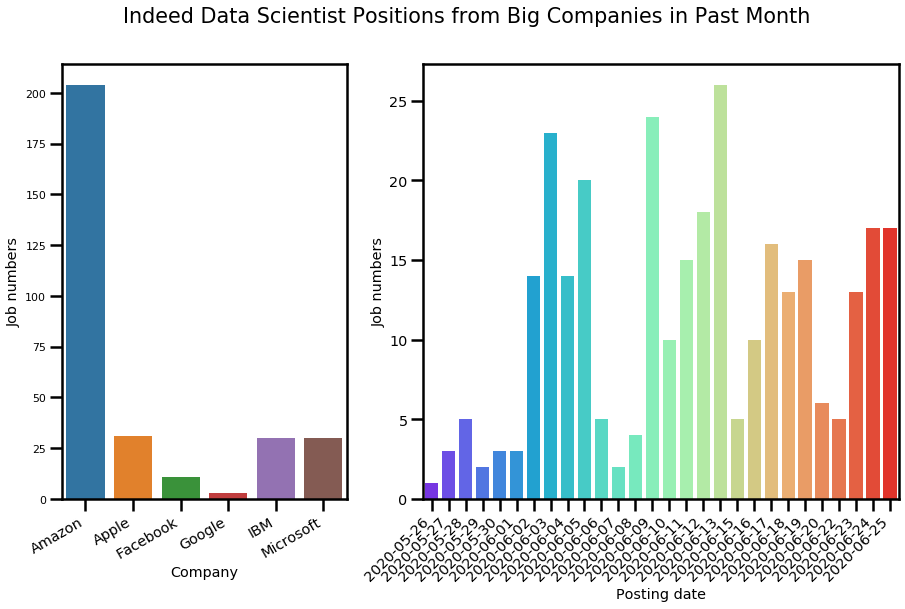

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('poster',font_scale=0.5)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 5]) 
#f, axes = plt.subplots(1,2)
plt.subplot(gs[0])
sns.barplot(x='Company', y='Title',data=by_company_i)
plt.ylabel('Job numbers', fontsize='large')
plt.xlabel('Company', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.subplot(gs[1])
sns.barplot(x='Post date', y='Title', data=by_date_i, palette='rainbow')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Job numbers', fontsize='large')
plt.xlabel('Posting date', fontsize='large')
plt.suptitle('Indeed Data Scientist Positions from Big Companies in Past Month', fontsize='xx-large')
plt.show()

The above figure summerizes data scraped from Indeed website showing data scientist job postings of big companies (Amazon including AWS, Apple, Facebook, Google, IBM, and Microsoft) in the past month (05/26/2020-06/25/2020). The left panel demonstrates the comparison of job numbers among these big companies and the right panel shows the distribution of total job postings from these big companies on a daily basis. Compared with LinkedIn data, we find that Indeed data suggest a similar trend as LinkedIn, showing that Amazon takes a leading position with highest demand in data scientist positions and Google stays the last. 

## Glassdoor Jobs

In [ ]:
df_tot_g = pd.read_csv('/Users/tingtingweng/Documents/summer_intern/glassdoor_0623.csv')
df_tot_g

,Title,Company,State,Location,Post_date,Date in num,Posting date
0,Data Scientist,Triplebyte,california,"San Francisco, CA",3d,3,6/23/2020
1,Staff Data Scientist - Analytics,Intuit - Data,california,"San Diego, CA",24hr,24,6/2/2020
2,Data Scientist,Eversight,california,"Palo Alto, CA",14d,14,6/12/2020
3,Data Scientist,GovTech,california,"San Francisco, CA",24hr,24,6/2/2020
4,Data Science Health Innovation Fellow,UCSF Medical Center,california,"San Francisco, CA",2d,2,6/24/2020
...,...,...,...,...,...,...,...
11446,Med Lab Scientist I - Phleb - PCMH,Sonora Quest Laboratories,Wyoming,"Wheatland, WY",24hr,24,6/2/2020
11447,Venture Leader Data Science and AI - Cleveland,Bamboo Crowd,Wyoming,"Midwest, WY",30d+,30,5/27/2020
11448,Computer Scientist,Air Education and Training Command,Wyoming,"Fort Warren AFB, WY",3d,3,6/23/2020
11449,Computer Scientist,Air Force Materiel Command,Wyoming,"Fort Warren AFB, WY",17d,17,6/9/2020


In [ ]:
by_date = df_tot_g.groupby('Posting date').count().sort_values(by=['Posting date'], ascending=True).reset_index()
by_date

,Posting date,Title,Company,State,Location,Post_date,Date in num
0,5/27/2020,1297,1297,1297,1297,1297,1297
1,5/28/2020,43,43,43,43,43,43
2,5/29/2020,112,112,112,112,112,112
3,5/30/2020,413,413,413,413,413,413
4,5/31/2020,86,86,86,86,86,86
5,6/1/2020,68,68,68,68,68,68
6,6/10/2020,330,330,330,330,330,330
7,6/11/2020,316,316,316,316,316,316
8,6/12/2020,398,398,398,398,398,398
9,6/13/2020,361,361,361,361,361,361


In [ ]:
df_short_g = df_tot_g.drop_duplicates().reset_index(drop=True)
df_short_g

,Title,Company,State,Location,Post_date,Date in num,Posting date
0,Staff Data Scientist - Analytics,Intuit - Data,CA,"San Diego, CA",24hr,24,6/4/2020
1,Health Data Scientist - Biomedical/Biostats,Evidation,CA,"Santa Barbara, CA",16d,16,6/12/2020
2,Data Science Intern,"Fullpower Technologies, Inc.",CA,"Santa Cruz, CA",22d,22,6/6/2020
3,Data Scientist - Machine Learning,CareDx,CA,"Brisbane, CA",15d,15,6/13/2020
4,Staff Data Scientist,Intuit - Data,CA,"Mountain View, CA",24hr,24,6/4/2020
...,...,...,...,...,...,...,...
10083,Venture Leader Data Science and AI - Cleveland,Bamboo Crowd,WY,"Midwest, WY",30d+,30,5/29/2020
10084,Med Lab Scientist I - Phleb - PCMH,Sonora Quest Laboratories,WY,"Wheatland, WY",3d,3,6/25/2020
10085,Computer Scientist,Air Education and Training Command,WY,"Fort Warren AFB, WY",5d,5,6/23/2020
10086,Country Principal Medical Affairs Scientist - ...,GSK,WY,"Fort Warren AFB, WY",9d,9,6/19/2020


In [ ]:
past_month_g = df_short_g.loc[(df_short_g['Posting date']>='5/26/2020') & (df_tot_g['Posting date']<='6/25/2020')].reset_index(drop=True)
past_month_g.dropna(inplace=True)

In [ ]:
past_month_g.loc[past_month_g['Company']=='Amazon'].reset_index()

,index,Title,Company,State,Location,Post_date,Date in num,Posting date
0,218,Sr. Data Scientist,Amazon,CA,"Sunnyvale, CA",14d,14,6/14/2020
1,389,Sr. Applied Scientist,Amazon,CA,"Sunnyvale, CA",3d,3,6/25/2020
2,537,Data Scientist,Amazon,AZ,"Tempe, AZ",5d,5,6/23/2020
3,582,Applied Scientist III,Amazon,AZ,"Tempe, AZ",4d,4,6/24/2020
4,584,Data Engineer - Brand Program,Amazon,AZ,"Tempe, AZ",4d,4,6/24/2020
...,...,...,...,...,...,...,...,...
72,7957,"Senior Applied Scientist, Deep Learning",Amazon,WA,"Seattle, WA",15d,15,6/13/2020
73,7958,"Sr. Applied Scientist, Amazon Alexa AI",Amazon,WA,"Seattle, WA",27d,27,6/1/2020
74,7986,Sr. Machine Learning Scientist,Amazon,WA,"Seattle, WA",3d,3,6/25/2020
75,7999,Sr. Business/Data Analyst,Amazon,WA,"Seattle, WA",17d,17,6/11/2020


In [ ]:
past_month_g.loc[past_month_g['Company'].str.contains('Amazon'),'Company']='Amazon'
amazon_g = past_month_g.loc[past_month_g['Company'].str.contains('Amazon')].reset_index()
amazon_g

,index,Title,Company,State,Location,Post_date,Date in num,Posting date
0,218,Sr. Data Scientist,Amazon,CA,"Sunnyvale, CA",14d,14,6/14/2020
1,389,Sr. Applied Scientist,Amazon,CA,"Sunnyvale, CA",3d,3,6/25/2020
2,537,Data Scientist,Amazon,AZ,"Tempe, AZ",5d,5,6/23/2020
3,582,Applied Scientist III,Amazon,AZ,"Tempe, AZ",4d,4,6/24/2020
4,584,Data Engineer - Brand Program,Amazon,AZ,"Tempe, AZ",4d,4,6/24/2020
...,...,...,...,...,...,...,...,...
174,8018,Data Engineer | International Seller Services-...,Amazon,WA,"Seattle, WA",30d+,30,5/29/2020
175,8019,Applied Scientist - Middle Mile Resource Plann...,Amazon,WA,"Seattle, WA",30d+,30,5/29/2020
176,8020,"Applied Scientist, Amazon Alexa AI",Amazon,WA,"Seattle, WA",30d+,30,5/29/2020
177,8021,Join WW Operations Data & Applied Sciences,Amazon,WA,"Seattle, WA",30d+,30,5/29/2020


In [ ]:
past_month_g.loc[past_month_g['Company'].str.contains('Google'),'Company']='Google'
google_g = past_month_g.loc[past_month_g['Company'].str.contains('Google')].reset_index()
google_g

,index,Title,Company,State,Location,Post_date,Date in num,Posting date
0,773,"Data Engineer, Users and Products",Google,CO,"Boulder, CO",15d,15,6/13/2020
1,2918,"Research Scientist, Google AI (United States)",Google,MA,"Cambridge, MA",5d,5,6/23/2020
2,4613,"Product Analyst, Data Science",Google,NY,"New York, NY",16d,16,6/12/2020
3,4617,Data Scientist Technical Lead,Google,NY,"New York, NY",5d,5,6/23/2020
4,4741,"Product Analytics Lead, Data Science",Google,NY,"New York, NY",16d,16,6/12/2020
5,6563,"Data Scientist, Cloud Support Data and Analytics",Google,TX,"Austin, TX",4d,4,6/24/2020
6,7679,Data Scientist Technical Lead,Google,WA,"Seattle, WA",16d,16,6/12/2020
7,7685,Quantitative Analyst,Google,WA,"Seattle, WA",10d,10,6/18/2020


In [ ]:
past_month_g.loc[past_month_g['Company'].str.contains('IBM'),'Company']='IBM'
ibm_g = past_month_g.loc[past_month_g['Company'].str.contains('IBM')].reset_index()
ibm_g

,index,Title,Company,State,Location,Post_date,Date in num,Posting date
0,184,Data Scientist- Industrial Process Sector Indu...,IBM,CA,"San Jose, CA",13d,13,6/15/2020
1,422,Quantum Data Scientist- Industrial Discrete Se...,IBM,CA,"Los Angeles, CA",13d,13,6/15/2020
2,430,Quantum Principal Data Scientist- Industrial P...,IBM,CA,"San Jose, CA",3d,3,6/25/2020
3,547,Data Scientist- Industrial Discrete Sector Ind...,IBM,AZ,"Phoenix, AZ",13d,13,6/15/2020
4,555,Data Scientist- Industrial Process Sector Indu...,IBM,AZ,"Phoenix, AZ",13d,13,6/15/2020
...,...,...,...,...,...,...,...,...
75,6824,Quantum Principal Data Scientist- Industrial D...,IBM,TX,"Austin, TX",14d,14,6/14/2020
76,6853,Principal Data Scientist- Industrial Discrete ...,IBM,TX,"Houston, TX",13d,13,6/15/2020
77,7360,DevOps Engineer/Data Scientist (TS/SCI FSP),IBM,VA,"Chantilly, VA",4d,4,6/24/2020
78,7519,Data Engineer (TS/SCI + FS Poly),IBM,VA,"Chantilly, VA",10d,10,6/18/2020


In [ ]:
past_month_g.loc[past_month_g['Company'].str.contains('Microsoft'),'Company']='Microsoft'
ms_g = past_month_g.loc[past_month_g['Company'].str.contains('Microsoft')].reset_index()
ms_g

,index,Title,Company,State,Location,Post_date,Date in num,Posting date
0,6619,Senior Data & Applied Scientist,Microsoft,TX,"Austin, TX",27d,27,6/1/2020
1,7646,Data & Applied Scientist,Microsoft,WA,"Redmond, WA",4d,4,6/24/2020
2,7662,Data & Applied Scientist 2,Microsoft,WA,"Redmond, WA",30d+,30,5/29/2020
3,7670,Data & Applied Scientist II,Microsoft,WA,"Redmond, WA",4d,4,6/24/2020
4,7672,Principal Data Scientist Lead,Microsoft,WA,"Redmond, WA",30d+,30,5/29/2020
5,7681,Research Intern - Data Visualization,Microsoft,WA,"Redmond, WA",17d,17,6/11/2020
6,7692,Sr. Data & Applied Scientist,Microsoft,WA,"Bellevue, WA",11d,11,6/17/2020
7,7695,Research Intern - Systems for Efficient Data S...,Microsoft,WA,"Redmond, WA",5d,5,6/23/2020
8,7697,Sr Data Scientist,Microsoft,WA,"Redmond, WA",30d+,30,5/29/2020
9,7706,Applied Scientist 2,Microsoft,WA,"Bellevue, WA",30d+,30,5/29/2020


In [ ]:
big_companies_g = pd.DataFrame()
for big_company_g in ['Facebook','Apple','Amazon','Google','IBM','Microsoft']:
    big_companies_g = big_companies_g.append(past_month_g.loc[past_month_g['Company']==big_company_g])

#big_companies.reset_index(drop=True, inplace=True)
big_companies_g

,Title,Company,State,Location,Post_date,Date in num,Posting date
59,"Data Scientist, SBG",Facebook,CA,"Menlo Park, CA",4d,4,6/24/2020
185,"Return to Work - Research Data Scientist, Infr...",Facebook,CA,"Menlo Park, CA",11d,11,6/17/2020
275,"UX Quantitative Researcher, Instagram",Facebook,CA,"Menlo Park, CA",3d,3,6/25/2020
4606,"Data Scientist, Analytics- Instagram-Family St...",Facebook,NY,"New York, NY",7d,7,6/21/2020
4667,"Data Scientist, Analytics - Recruiting Products",Facebook,NY,"New York, NY",9d,9,6/19/2020
...,...,...,...,...,...,...,...
7822,Applied Scientist II,Microsoft,WA,"Redmond, WA",9d,9,6/19/2020
7883,Sr. Machine Learning Engineer,Microsoft,WA,"Redmond, WA",10d,10,6/18/2020
7941,Sr. Machine Learning Engineer,Microsoft,WA,"Redmond, WA",30d+,30,5/29/2020
7961,Senior Applied Scientist,Microsoft,WA,"Bellevue, WA",29d,29,5/30/2020


In [ ]:
by_date_g = big_companies_g.groupby('Posting date').count().sort_values(by=['Posting date'], ascending=True).reset_index()
by_date_g

,Posting date,Title,Company,State,Location,Post_date,Date in num
0,5/29/2020,83,83,83,83,83,83
1,5/30/2020,3,3,3,3,3,3
2,6/1/2020,8,8,8,8,8,8
3,6/10/2020,8,8,8,8,8,8
4,6/11/2020,39,39,39,39,39,39
5,6/12/2020,15,15,15,15,15,15
6,6/13/2020,18,18,18,18,18,18
7,6/14/2020,4,4,4,4,4,4
8,6/15/2020,50,50,50,50,50,50
9,6/16/2020,6,6,6,6,6,6


In [ ]:
by_company_g = big_companies_g.groupby('Company').count().sort_values(by=['Company'], ascending=True).reset_index()
by_company_g

,Company,Title,State,Location,Post_date,Date in num,Posting date
0,Amazon,179,179,179,179,179,179
1,Apple,20,20,20,20,20,20
2,Facebook,12,12,12,12,12,12
3,Google,8,8,8,8,8,8
4,IBM,80,80,80,80,80,80
5,Microsoft,21,21,21,21,21,21


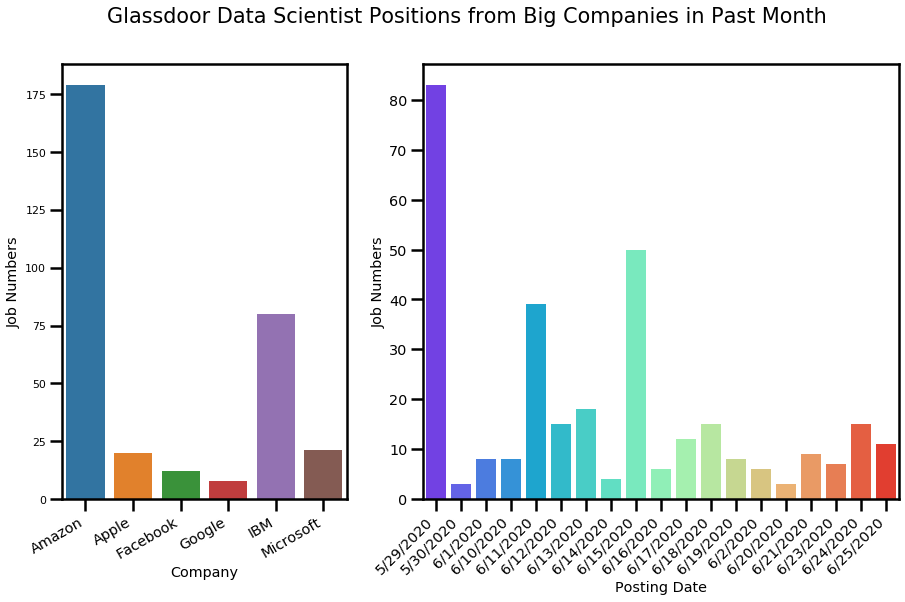

In [ ]:
plt.figure(figsize=(15,8))
sns.set_context('poster',font_scale=0.5)
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 5]) 
#f, axes = plt.subplots(1,2)
plt.subplot(gs[0])
sns.barplot(x='Company', y='Title',data=by_company_g)
plt.ylabel('Job Numbers', fontsize='large')
plt.xlabel('Company', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.subplot(gs[1])
sns.barplot(x='Posting date', y='Title', data=by_date_g, palette='rainbow')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.yticks(fontsize='large')
plt.ylabel('Job Numbers', fontsize='large')
plt.xlabel('Posting Date', fontsize='large')
plt.suptitle('Glassdoor Data Scientist Positions from Big Companies in Past Month', fontsize='xx-large')
plt.show()

The above figure summerizes data scraped from Glassdoor website showing data scientist job postings of big companies (Amazon including AWS, Apple, Facebook, Google, IBM, and Microsoft) in the past month (05/26/2020-06/25/2020). The left panel demonstrates the comparison of job numbers among these big companies and the right panel shows the distribution of total job postings from these big companies on a daily basis. Compared with LinkedIn and Indeed data, we find that Glassdoor data indicates the same conclusion as LinkedIn and Indeed, suggesting that Amazon has offered most data scientist positions while Google has released least job openning in the past month. 

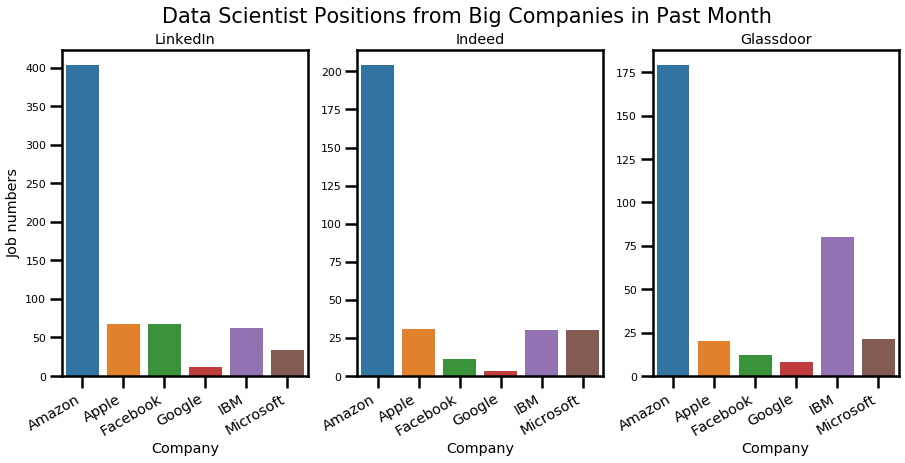

In [ ]:
plt.figure(figsize=(15,6))
sns.set_context('poster',font_scale=0.5)
plt.subplot(131)
sns.barplot(x='Company', y='Title',data=by_company_l)
plt.ylabel('Job numbers', fontsize='large')
plt.xlabel('Company', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.title('LinkedIn',fontsize='large')
plt.subplot(132)
sns.barplot(x='Company', y='Title',data=by_company_i)
plt.xlabel('Company', fontsize='large')
plt.ylabel('', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.title('Indeed',fontsize='large')
plt.subplot(133)
sns.barplot(x='Company', y='Title',data=by_company_g)
plt.ylabel('', fontsize='large')
plt.xlabel('Company', fontsize='large')
plt.xticks(rotation=30, horizontalalignment='right', fontweight='light', fontsize='large')
plt.title('Glassdoor',fontsize='large')
plt.suptitle('Data Scientist Positions from Big Companies in Past Month', fontsize='xx-large')
plt.show()